## 作業
在鐵達尼資料集中，   
可以用今天範例中提到的三種辨識異常值的方法，  
以 training data 為資料集。  
1.觀察票價是否有異常值的現象?  
2.你覺得找出的異常是真的異常? 你覺得需要做處理嗎?  
(試著講出自己的想法。)  


### 資料
鐵達尼號 train 資料集


In [1]:
# library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn  as sns
from scipy import stats
import math
import statistics
#讓圖可以在 jupyter notebook顯示
%matplotlib inline

In [3]:
df_train = pd.read_csv("Titanic_train.csv")
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 探索性分析:
*  觀察-是否有異常值  
我們來觀察一下 Fare 變數吧!!

## Q1:觀察票價是否有異常值的現象?

## 方法1
* 進行一個描述性的統計（規定範圍），從而檢視哪些值是不合理的（範圍以外的值）。  


32.2042079685746
49.693428597180905
0


C:\Users\rober\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(-5.0, 300.0)

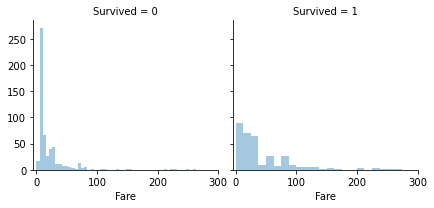

In [23]:
print(df_train['Fare'].mean()) #age平均
print(df_train['Fare'].std()) #age標準差
print(df_train['Fare'].isnull().any().sum())
g = sns.FacetGrid(df_train, col='Survived')
g.map(sns.distplot, 'Fare', kde=False)
plt.xlim(-5,300)

In [14]:
df_train["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [68]:
df_train["FareRange"]=pd.cut(df_train["Fare"],np.linspace(0,df_train["Fare"].max(),df_train["Pclass"].nunique()+1),include_lowest=True)
#df_train.drop(["Farerange"],axis="columns",inplace=True)      
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FareRange
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(-0.001, 170.776]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(-0.001, 170.776]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(-0.001, 170.776]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(-0.001, 170.776]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"(-0.001, 170.776]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,"(-0.001, 170.776]"
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,"(-0.001, 170.776]"
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,"(-0.001, 170.776]"
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,"(-0.001, 170.776]"


## 方法 2
* 進行3倍標準差原則的計算，從而檢視哪些值是可疑的異常值。  


In [57]:
import numpy as np

# 創建一個函數，計算在這個資料中， ys:資料，times : 幾倍標準差，找出在這樣條件下的異常值。
def outliers_z_score(ys,times):
    mean_y = np.mean(ys)
    stdev_y = np.std(ys)
    z_scores = [(y - mean_y) / stdev_y for y in ys]
    return np.where(np.abs(z_scores) > times)

out_index=outliers_z_score(df_train['Fare'],3)
print(out_index[0])
print(df_train["Fare"][out_index[0]])
print("用第二種方法的找出的 outlier 有哪些?")
print(df_train.loc[out_index[0]])
#  所以用這個方法，找出的 outlier 就是少數族群，年齡較大的，一位是 80 和 74。

[ 27  88 118 258 299 311 341 377 380 438 527 557 679 689 700 716 730 737
 742 779]
27     263.0000
88     263.0000
118    247.5208
258    512.3292
299    247.5208
311    262.3750
341    263.0000
377    211.5000
380    227.5250
438    263.0000
527    221.7792
557    227.5250
679    512.3292
689    211.3375
700    227.5250
716    227.5250
730    211.3375
737    512.3292
742    262.3750
779    211.3375
Name: Fare, dtype: float64
用第二種方法的找出的 outlier 有哪些?
     PassengerId  Survived  Pclass  \
27            28         0       1   
88            89         1       1   
118          119         0       1   
258          259         1       1   
299          300         1       1   
311          312         1       1   
341          342         1       1   
377          378         0       1   
380          381         1       1   
438          439         0       1   
527          528         0       1   
557          558         0       1   
679          680         1       1   
689          6

## 方法3-盒鬚圖判別法(IQR method)

In [16]:
import numpy as np
# 透過一個函數來判斷是否為異常值
def outliers_iqr(ys,times):
    #注意 使用 np.percentile 要去除 nan 要不然計算出來會錯誤，所以我們採用下者的程式 np.nanpercentile
    #quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    quartile_1, quartile_3 = np.nanpercentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * times)
    upper_bound = quartile_3 + (iqr * times)
    return np.where((ys > upper_bound) | (ys < lower_bound))

In [21]:
outlier=outliers_iqr(df_train["Fare"],1.5)
print("離群值平均:",df_train["Fare"][outlier[0]].mean())

離群值平均: 128.29162931034472


0


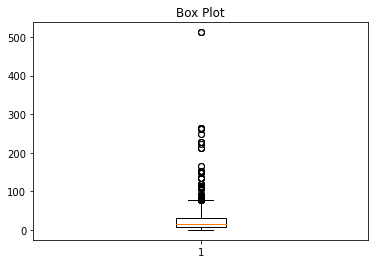

In [36]:
##判斷高於2倍IOR2的離群值 
##判斷Fare欄位有無缺失值
print(df_train['Fare'].isnull().any().sum())
plt.boxplot(df_train['Fare'],whis=2)    #作圖
plt.title('Box Plot')
plt.show()

C:\Users\rober\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\rober\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 62.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Fare'>

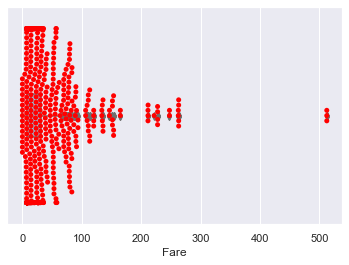

In [58]:
sns.set(style="darkgrid")
sns.boxplot(x = df_train["Fare"], orient = "h", color = "skyblue", width=0.2)  # 畫盒圖
sns.swarmplot(x = df_train["Fare"], orient = "v", color = "red")

# Q2:你覺得找出的異常是真的異常? 你覺得需要做處理嗎?


Ans:並不是,因為根據使用者付費原則及船上乘客財富不同影響,票價較高通常都是艙等較高的乘客,也因此能享受更好的服務,因此離群值不需要特別做處理
    是正常的現象

In [69]:
print(df_train.loc[out_index[0],["Pclass","Fare","FareRange"]])

     Pclass      Fare           FareRange
27        1  263.0000  (170.776, 341.553]
88        1  263.0000  (170.776, 341.553]
118       1  247.5208  (170.776, 341.553]
258       1  512.3292  (341.553, 512.329]
299       1  247.5208  (170.776, 341.553]
311       1  262.3750  (170.776, 341.553]
341       1  263.0000  (170.776, 341.553]
377       1  211.5000  (170.776, 341.553]
380       1  227.5250  (170.776, 341.553]
438       1  263.0000  (170.776, 341.553]
527       1  221.7792  (170.776, 341.553]
557       1  227.5250  (170.776, 341.553]
679       1  512.3292  (341.553, 512.329]
689       1  211.3375  (170.776, 341.553]
700       1  227.5250  (170.776, 341.553]
716       1  227.5250  (170.776, 341.553]
730       1  211.3375  (170.776, 341.553]
737       1  512.3292  (341.553, 512.329]
742       1  262.3750  (170.776, 341.553]
779       1  211.3375  (170.776, 341.553]
